In [139]:
import os

# Folder to save all plots
SAVE_DIR = "images"

os.makedirs(SAVE_DIR, exist_ok=True)

In [140]:
def save_plot(filename):
    path = os.path.join(SAVE_DIR, filename)
    plt.savefig(path, dpi=300, bbox_inches='tight')
    print(f"Saved: {path}")

In [141]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_theme(style="whitegrid")
plt.style.use("ggplot")

In [142]:
#Load Dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
#Preprocessing Functions

def preprocess_titanic(df):
    df = df.copy()

    # Fill Missing Values
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Encode categorical
    sex_encoder = LabelEncoder()
    embarked_encoder = LabelEncoder()

    df['Sex'] = sex_encoder.fit_transform(df['Sex'])
    df['Embarked'] = embarked_encoder.fit_transform(df['Embarked'])

    # Feature Engineering (IMPORTANT)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Drop unwanted columns
    df = df.drop(['Name','Ticket','Cabin'], axis=1, errors='ignore')

    return df

In [146]:
#Apply Preprocessing
train_processed = preprocess_titanic(train_df)
train_processed.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,1


In [148]:
#Train-Test Split
X = train_processed.drop("Survived", axis=1)
y = train_processed["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [150]:
#Train the Model
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8212


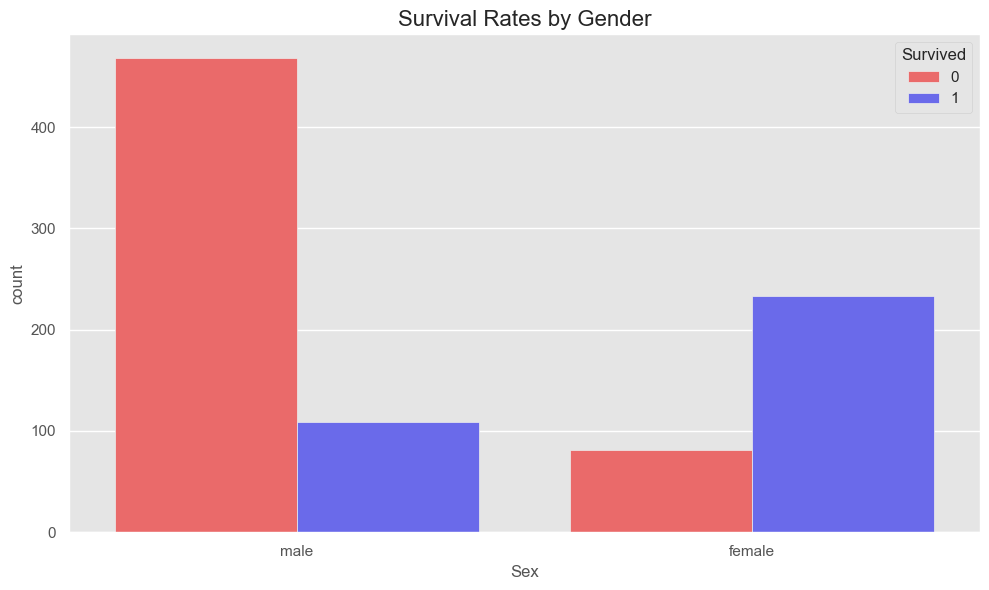

In [152]:
#EDA Section - Survival Analysis
#Gender Survival Analysis

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=train_df, palette=['#FF5555', '#5555FF'])
plt.title("Survival Rates by Gender", fontsize=16)
plt.tight_layout()
plt.show()

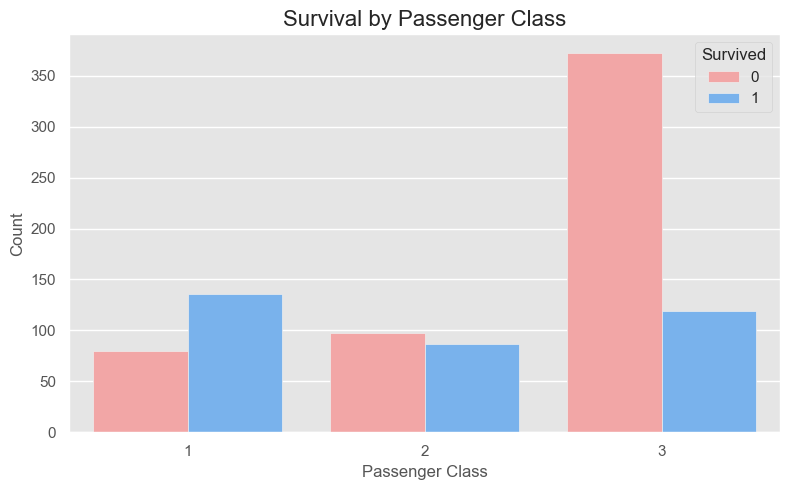

In [154]:
#Pclass Survival

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette=['#FF9999','#66B2FF'])

plt.title("Survival by Passenger Class", fontsize=16)
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

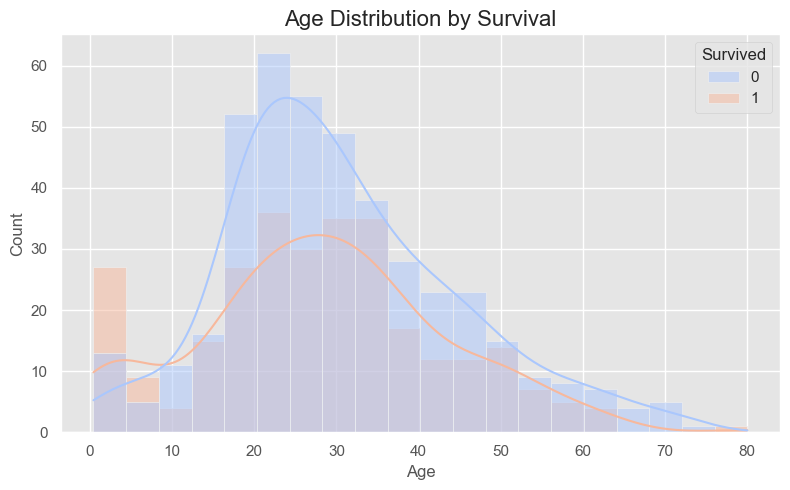

In [156]:
#Age Distribution

plt.figure(figsize=(8, 5))
sns.histplot(train_df, x='Age', hue='Survived', kde=True, palette='coolwarm')

plt.title("Age Distribution by Survival", fontsize=16)
plt.xlabel("Age")
plt.tight_layout()
plt.show()

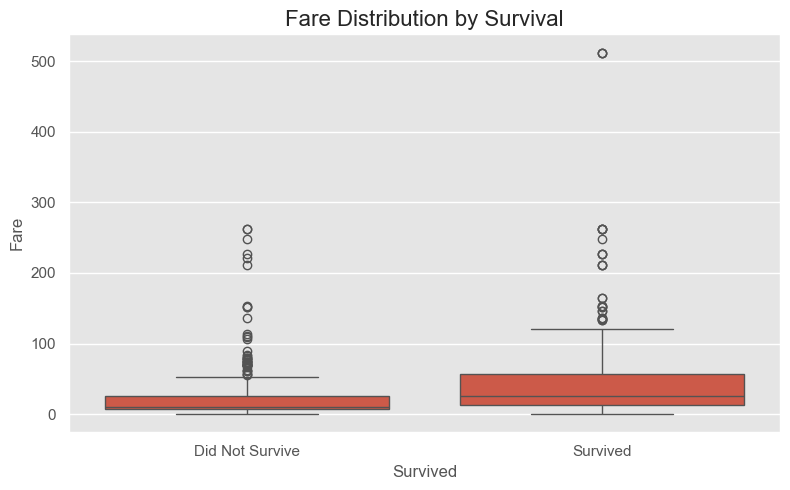

In [158]:
#Fare vs Survival

plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival", fontsize=16)
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()

In [160]:
#MACHINE LEARNING
#Feature Engineering

train_processed['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [162]:
#Train-Test Split

X = train_processed.drop("Survived", axis=1)
y = train_processed["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [164]:
#Train RandomForest Model

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 82.12290502793296


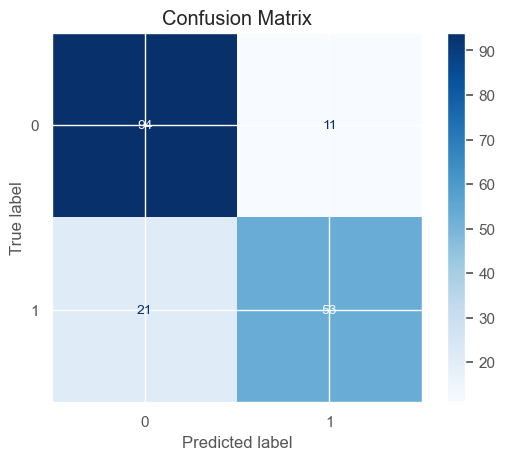

In [166]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

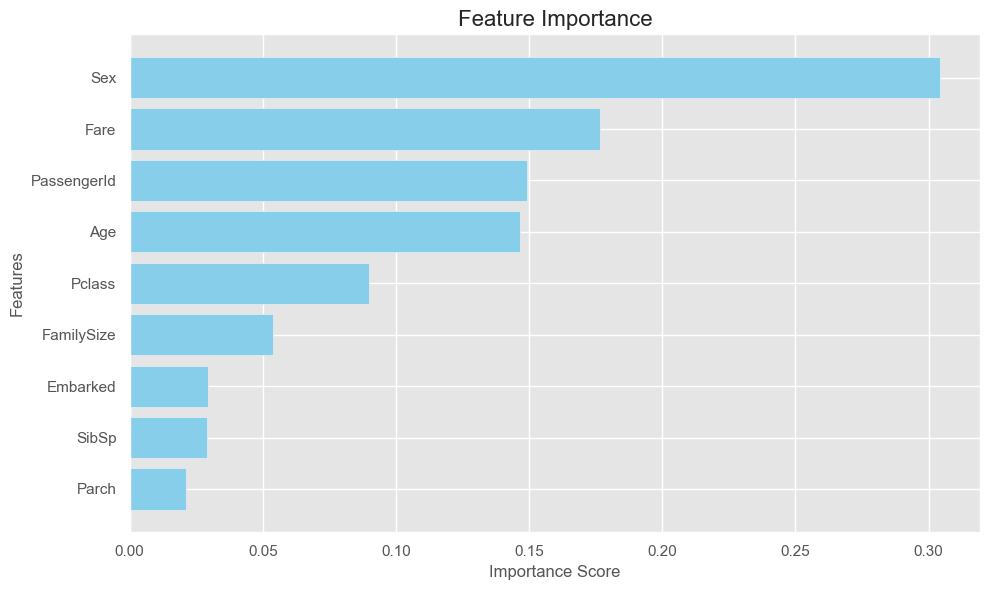

In [168]:
#Feature Importance

plot_feature_importance(model, X_train)

In [170]:
train_processed = preprocess_titanic(train_df)
test_processed  = preprocess_titanic(test_df)
final_predictions = model.predict(test_processed)

In [172]:
print(final_predictions)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [174]:
final_predictions[:10]


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [180]:
pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_predictions
}).head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [183]:
# Generate predictions for test data
final_predictions = model.predict(test_processed)

# Create submission dataframe
submission_df = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_predictions
})

submission_df.head()
# Save submission file
submission_df.to_csv("submission.csv", index=False)

print("submission.csv generated successfully!")


submission.csv generated successfully!
